In [510]:
from itertools import count
from statistics import variance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_theme(style="whitegrid")

df = pd.read_csv("student-por.csv")

# EDA

## Step 1: The First Look

In [511]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(f"\nColumn names: {df.columns.tolist()}\n")


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
(649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data c

In [512]:
print('we can see that there are no missing values.')
print('16 features have numeric values(int) and 17 have non-numeric values : 33 total features.')
print('let\'s check for duplicates')

print(f"Total duplicated rows: {df.duplicated().sum()}")

we can see that there are no missing values.
16 features have numeric values(int) and 17 have non-numeric values : 33 total features.
let's check for duplicates
Total duplicated rows: 0


In [513]:
print('there are also 0 duplicates\n')
print('Number of unique values for every column:')
for i in df:
    print(f'{i} has {df[i].nunique()} unique values.')

there are also 0 duplicates

Number of unique values for every column:
school has 2 unique values.
sex has 2 unique values.
age has 8 unique values.
address has 2 unique values.
famsize has 2 unique values.
Pstatus has 2 unique values.
Medu has 5 unique values.
Fedu has 5 unique values.
Mjob has 5 unique values.
Fjob has 5 unique values.
reason has 4 unique values.
guardian has 3 unique values.
traveltime has 4 unique values.
studytime has 4 unique values.
failures has 4 unique values.
schoolsup has 2 unique values.
famsup has 2 unique values.
paid has 2 unique values.
activities has 2 unique values.
nursery has 2 unique values.
higher has 2 unique values.
internet has 2 unique values.
romantic has 2 unique values.
famrel has 5 unique values.
freetime has 5 unique values.
goout has 5 unique values.
Dalc has 5 unique values.
Walc has 5 unique values.
health has 5 unique values.
absences has 24 unique values.
G1 has 17 unique values.
G2 has 16 unique values.
G3 has 17 unique values.


## Step 2: Univariate Analysis (One Variable at a Time)

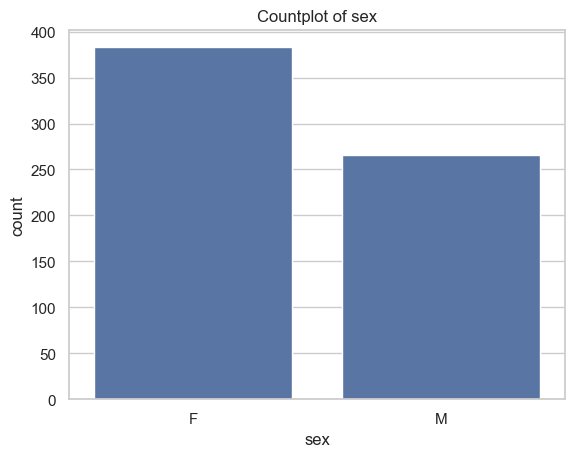

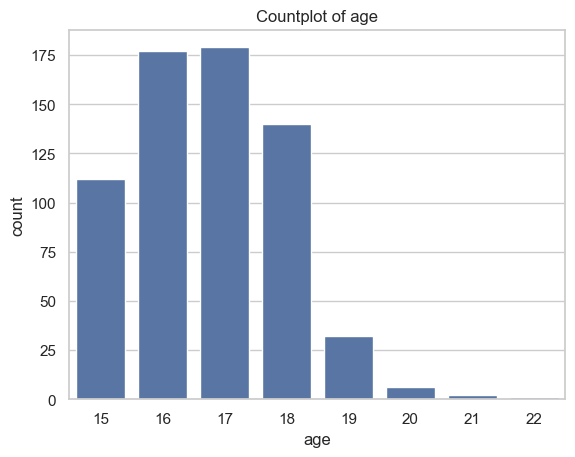

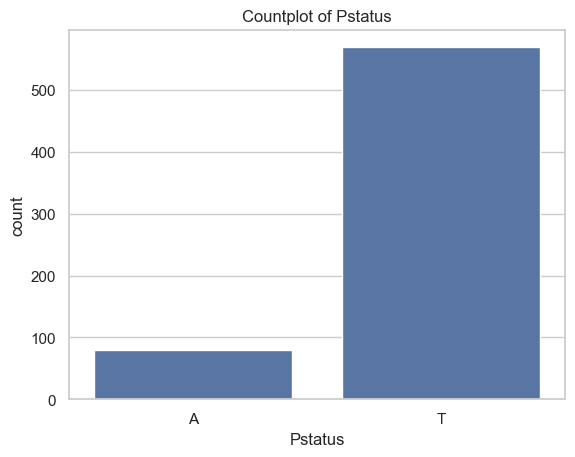

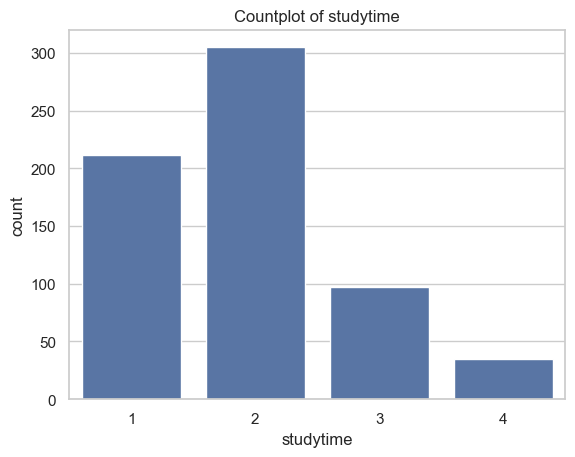

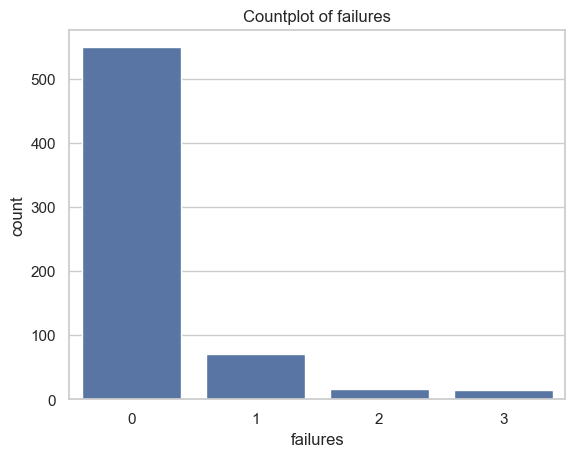

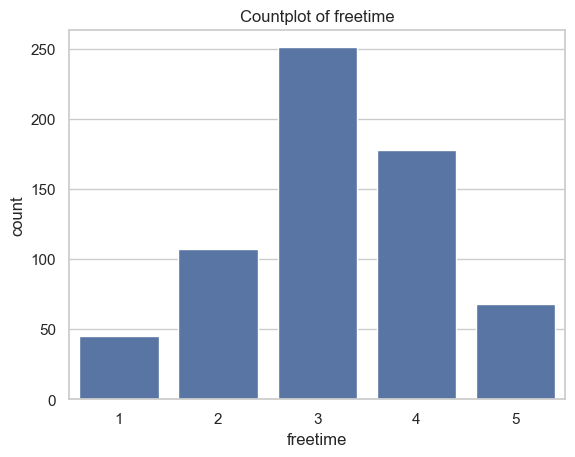

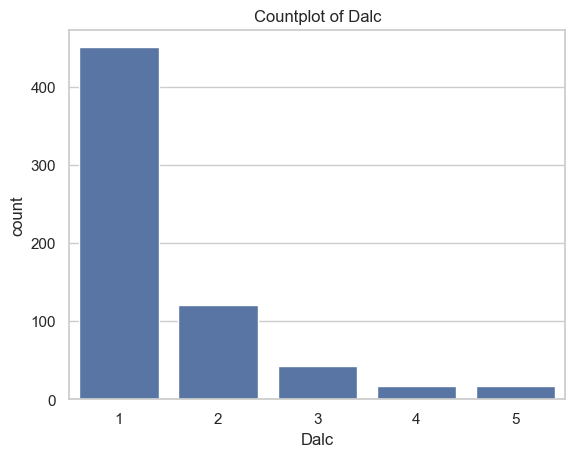

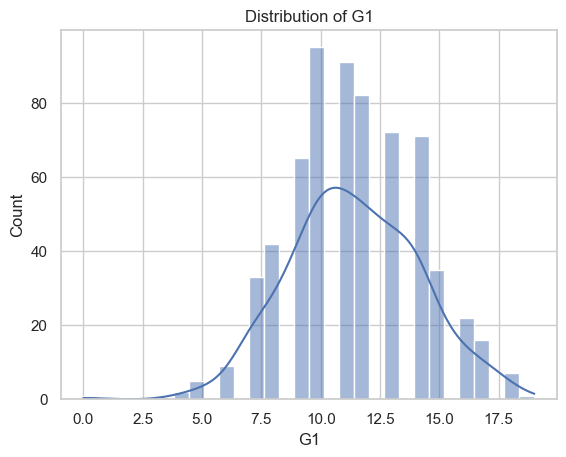

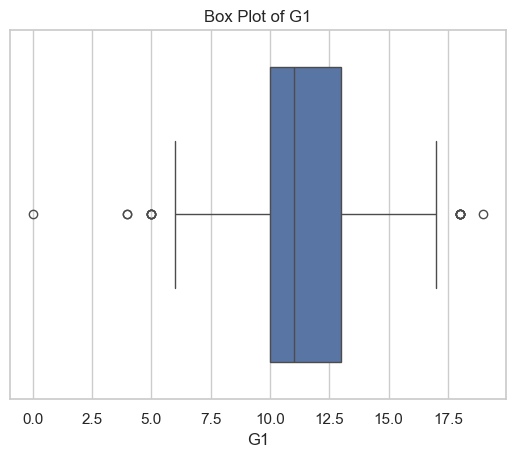

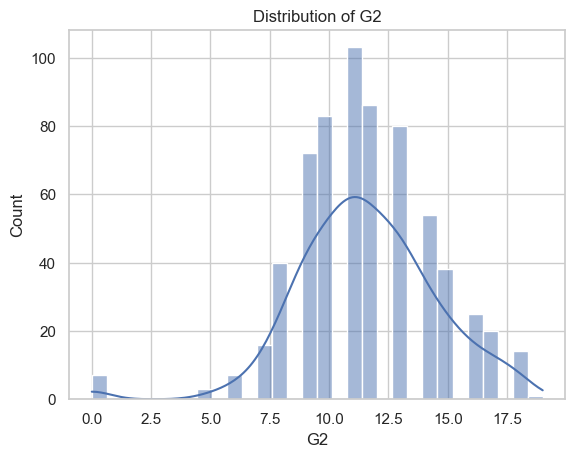

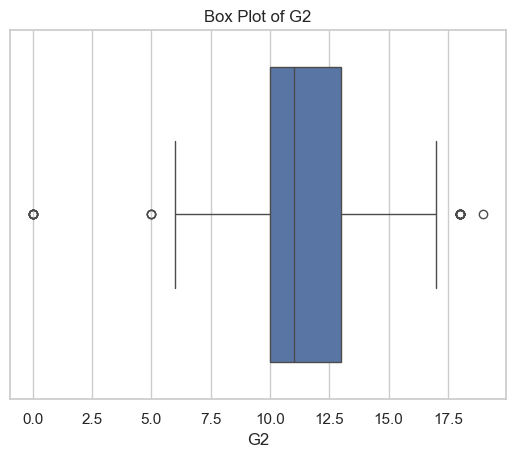

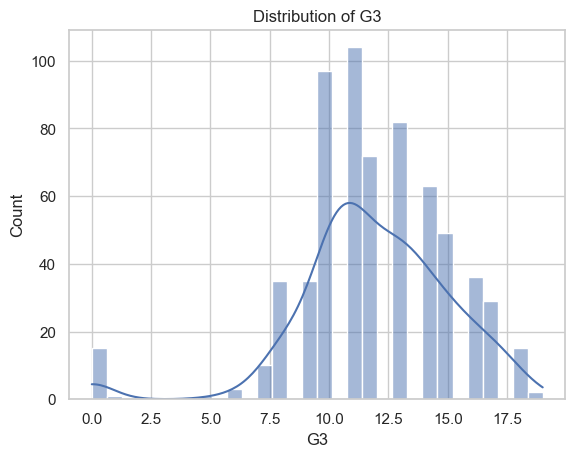

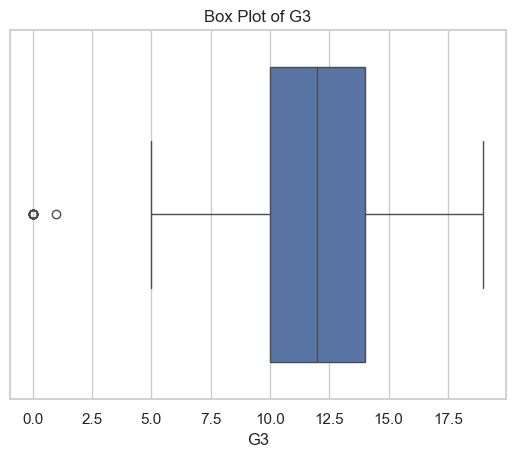

In [514]:
for i in ['sex', 'age', 'Pstatus', 'studytime', 'failures', 'freetime', 'Dalc', 'G1', 'G2', 'G3']:
    if df[i].nunique() > 10:
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.show()

        sns.boxplot(x=df[i])
        plt.title(f'Box Plot of {i}')
        plt.show()
    else:
        sns.countplot(x=df[i])
        plt.title(f'Countplot of {i}')
        plt.show()

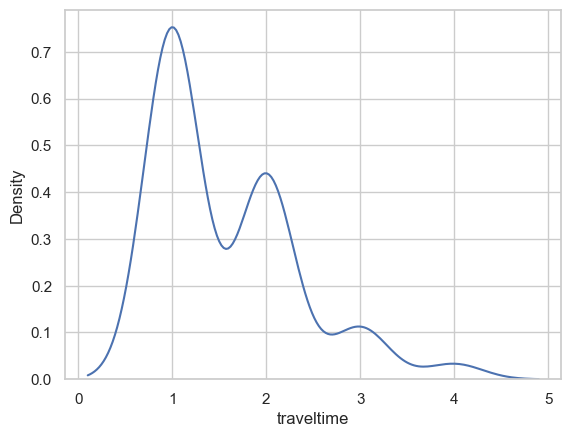

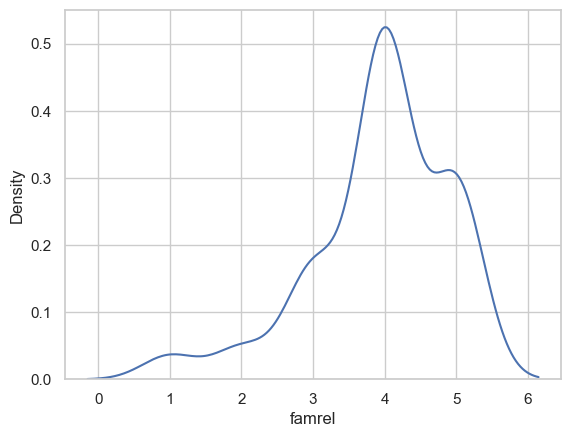

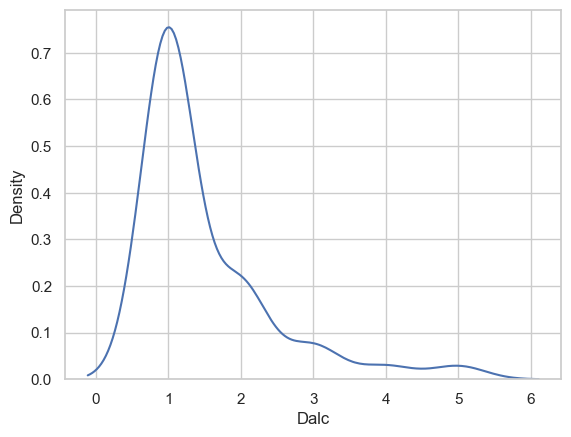

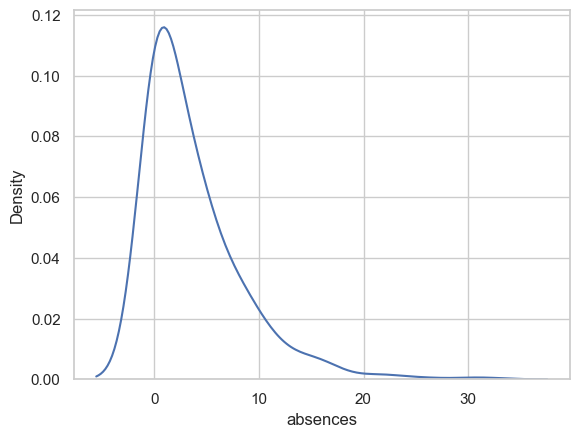

In [515]:
for i in ['traveltime', 'famrel', 'Dalc', 'absences']:
    sns.kdeplot(df[i], bw_method=0.4)
    plt.show()


In [516]:
print(f'{['traveltime', 'famrel', 'Dalc', 'absences']} columns are skewed')

['traveltime', 'famrel', 'Dalc', 'absences'] columns are skewed


## Step 3: Heatmap

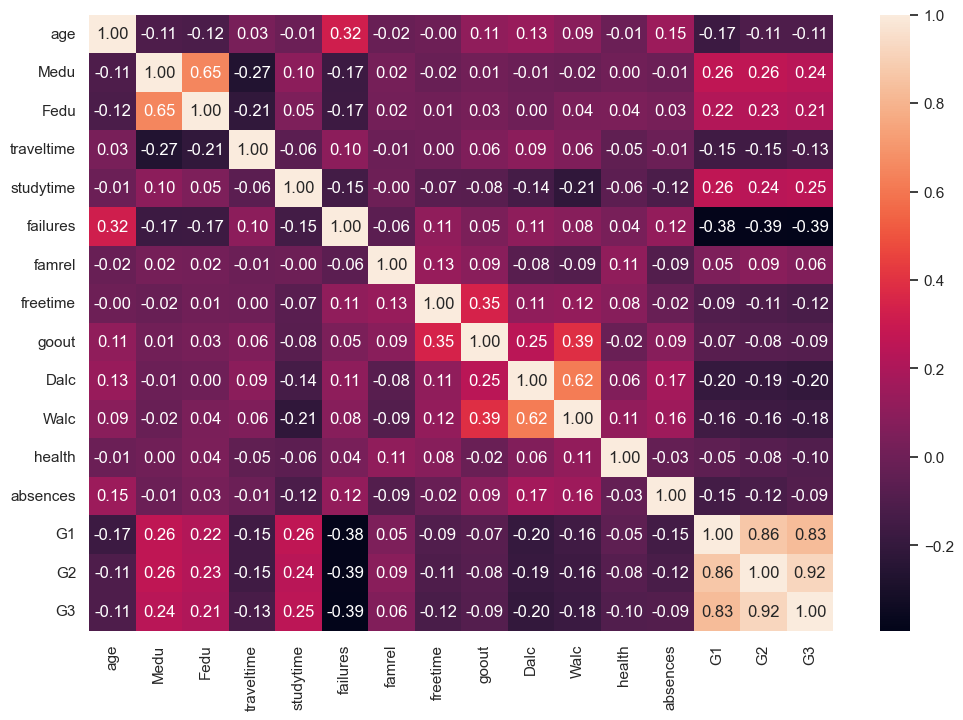

In [517]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

## Step 4: Summarize Findings & Plan Action

In [518]:
print('''
Findings summary:
    the heatmap shows that the features with highest correlation with G3 are:
    [G2, G1, -failures, studytime, Medu, Fedu]

    Target: G3 distribution is close to normal.

    Missing Data: The dataset is clean, no missing values to impute.

    Categorical: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet and romantic all need to be one-hot encoded.

    Key Predictors: G2 and G1 are the strongest predictors by far. studytime , Medu and Fedu are also positively correlated with G3. failures is negatively correlated with G3.

    Interactions: the heatmap shows that Medu and Fedu are correlated with each other, and Dalc is correlated with Walc.

    Unbalanced: Pstatus, failures, schoolsup, paid and higher are unbalanced.

    Skewed: famrel, Dalc and absences are skewed.

Action Plan:

    Preprocessing: One-hot encode school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet and romantic.

    Feature Engineering: calculate VIF and don't use features with high VIF.(dropping them one by one and recalculating VIF)

    Model Selection: Since G1 and G2 effects are so strong a LinearRegression will probably do well but try multiple models for comparison.

''')


Findings summary:
    the heatmap shows that the features with highest correlation with G3 are:
    [G2, G1, -failures, studytime, Medu, Fedu]

    Target: G3 distribution is close to normal.

    Missing Data: The dataset is clean, no missing values to impute.

    Categorical: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet and romantic all need to be one-hot encoded.

    Key Predictors: G2 and G1 are the strongest predictors by far. studytime , Medu and Fedu are also positively correlated with G3. failures is negatively correlated with G3.

    Interactions: the heatmap shows that Medu and Fedu are correlated with each other, and Dalc is correlated with Walc.

    Unbalanced: Pstatus, failures, schoolsup, paid and higher are unbalanced.

    Skewed: famrel, Dalc and absences are skewed.

Action Plan:

    Preprocessing: One-hot encode school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, gua

# Preprocessing

In [519]:
print('One-hot encoding the non-numerical features:\n')
df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], drop_first=True)

print(df_processed.head())

One-hot encoding the non-numerical features:

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  act

In [520]:
print('Splitting the data into Train and Test sections:\n')

Y = df_processed['G3']

X = df_processed.drop('G3', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=69
)

print(f"Training set shape (X): {X_train.shape}")
print(f"Testing set shape (X): {X_test.shape}")

Splitting the data into Train and Test sections:

Training set shape (X): (519, 41)
Testing set shape (X): (130, 41)


In [521]:
from sklearn.preprocessing import StandardScaler

print('Scaling certain features:\n')

scaler = StandardScaler()

columns_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.describe())

Scaling certain features:

                age          Medu          Fedu    traveltime     studytime  \
count  5.190000e+02  5.190000e+02  5.190000e+02  5.190000e+02  5.190000e+02   
mean  -7.016438e-16 -1.009683e-16 -8.043234e-17 -1.266382e-16  6.845306e-18   
std    1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00   
min   -1.444392e+00 -2.244250e+00 -2.117606e+00 -7.693894e-01 -1.144341e+00   
25%   -6.187979e-01 -4.646232e-01 -1.200212e+00 -7.693894e-01 -1.144341e+00   
50%    2.067962e-01 -4.646232e-01 -2.828189e-01 -7.693894e-01  5.306418e-02   
75%    1.032390e+00  1.315004e+00  6.345748e-01  5.796413e-01  5.306418e-02   
max    4.334767e+00  1.315004e+00  1.551968e+00  3.277703e+00  2.447874e+00   

           failures        famrel      freetime         goout          Dalc  \
count  5.190000e+02  5.190000e+02  5.190000e+02  5.190000e+02  5.190000e+02   
mean  -2.395857e-17  1.257825e-16  2.566990e-17 -5.476245e-17 -5.305112e-17   
std    1.000965e+00  1.0

### VIF

In [522]:
df_vif = X_train_scaled.copy()
for col in df_vif.columns:
    if df_vif[col].dtype not in ['int', 'float']:
        df_vif[col] = df_vif[col].astype('float')
print(df_vif.shape)
print(df_vif.info())
print(df_vif.head())

(519, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 514 to 54
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                519 non-null    float64
 1   Medu               519 non-null    float64
 2   Fedu               519 non-null    float64
 3   traveltime         519 non-null    float64
 4   studytime          519 non-null    float64
 5   failures           519 non-null    float64
 6   famrel             519 non-null    float64
 7   freetime           519 non-null    float64
 8   goout              519 non-null    float64
 9   Dalc               519 non-null    float64
 10  Walc               519 non-null    float64
 11  health             519 non-null    float64
 12  absences           519 non-null    float64
 13  G1                 519 non-null    float64
 14  G2                 519 non-null    float64
 15  school_MS          519 non-null    float64
 16  sex_M              5

In [523]:
vif = pd.DataFrame()
vif['features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print('VIF values:')
print(vif.sort_values(by='VIF', ascending=False))

VIF values:
             features        VIF
38         higher_yes  11.532622
25         Fjob_other   8.035465
19          Pstatus_T   7.860743
39       internet_yes   5.415140
37        nursery_yes   5.105411
26      Fjob_services   4.780931
13                 G1   4.758570
14                 G2   4.585167
31    guardian_mother   4.263663
17          address_U   4.100682
21         Mjob_other   3.279200
34         famsup_yes   2.828327
1                Medu   2.715285
22      Mjob_services   2.651492
23       Mjob_teacher   2.496630
16              sex_M   2.303592
36     activities_yes   2.268899
15          school_MS   2.214979
10               Walc   2.212266
2                Fedu   2.065729
20        Mjob_health   1.950999
9                Dalc   1.931371
27       Fjob_teacher   1.916144
30  reason_reputation   1.794244
40       romantic_yes   1.772428
28        reason_home   1.769743
24        Fjob_health   1.721163
18        famsize_LE3   1.669637
8               goout   1.48736

In [524]:
# removing features with VIF higher than the threshold:
threshold_vif = 1.5

keep_removing = True

while keep_removing:
    vif = pd.DataFrame()
    vif['features'] = df_vif.columns
    vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

    max_vif_feature = vif.loc[vif['VIF'].idxmax()]

    if max_vif_feature['VIF'] > threshold_vif:
        df_vif = df_vif.drop(max_vif_feature['features'], axis=1)
        print(f'Removed variable with high VIF: {max_vif_feature['features']} (VIF = {max_vif_feature["VIF"]})')
    else:
        keep_removing = False

Removed variable with high VIF: higher_yes (VIF = 11.532621820109853)
Removed variable with high VIF: Fjob_other (VIF = 7.618996811094558)
Removed variable with high VIF: Pstatus_T (VIF = 6.980669467438264)
Removed variable with high VIF: internet_yes (VIF = 4.775922644994466)
Removed variable with high VIF: G1 (VIF = 4.7140376639417685)
Removed variable with high VIF: nursery_yes (VIF = 4.666198075184471)
Removed variable with high VIF: address_U (VIF = 3.644787493980779)
Removed variable with high VIF: guardian_mother (VIF = 3.398924708901387)
Removed variable with high VIF: Medu (VIF = 2.5862107434042465)
Removed variable with high VIF: famsup_yes (VIF = 2.3933178629276393)
Removed variable with high VIF: sex_M (VIF = 2.1994982355842523)
Removed variable with high VIF: Walc (VIF = 2.1111633342391642)
Removed variable with high VIF: Mjob_other (VIF = 2.0258908344631394)
Removed variable with high VIF: activities_yes (VIF = 1.9113871868212438)
Removed variable with high VIF: school_MS

In [525]:
print(df_vif.shape)
vif = pd.DataFrame()
vif['features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print('VIF values:')
print(vif.sort_values(by='VIF', ascending=False))

(519, 25)
VIF values:
             features       VIF
24       romantic_yes  1.436796
1                Fedu  1.420324
11                 G2  1.419828
20  reason_reputation  1.407143
4            failures  1.406387
18        reason_home  1.386654
12        famsize_LE3  1.383551
14      Mjob_services  1.344743
15       Mjob_teacher  1.332248
17       Fjob_teacher  1.313264
0                 age  1.305901
13        Mjob_health  1.285210
16        Fjob_health  1.249652
7               goout  1.248964
19       reason_other  1.228349
21     guardian_other  1.208141
22      schoolsup_yes  1.195404
8                Dalc  1.189865
6            freetime  1.185790
3           studytime  1.146221
10           absences  1.144643
2          traveltime  1.142405
23           paid_yes  1.120224
5              famrel  1.090421
9              health  1.080926


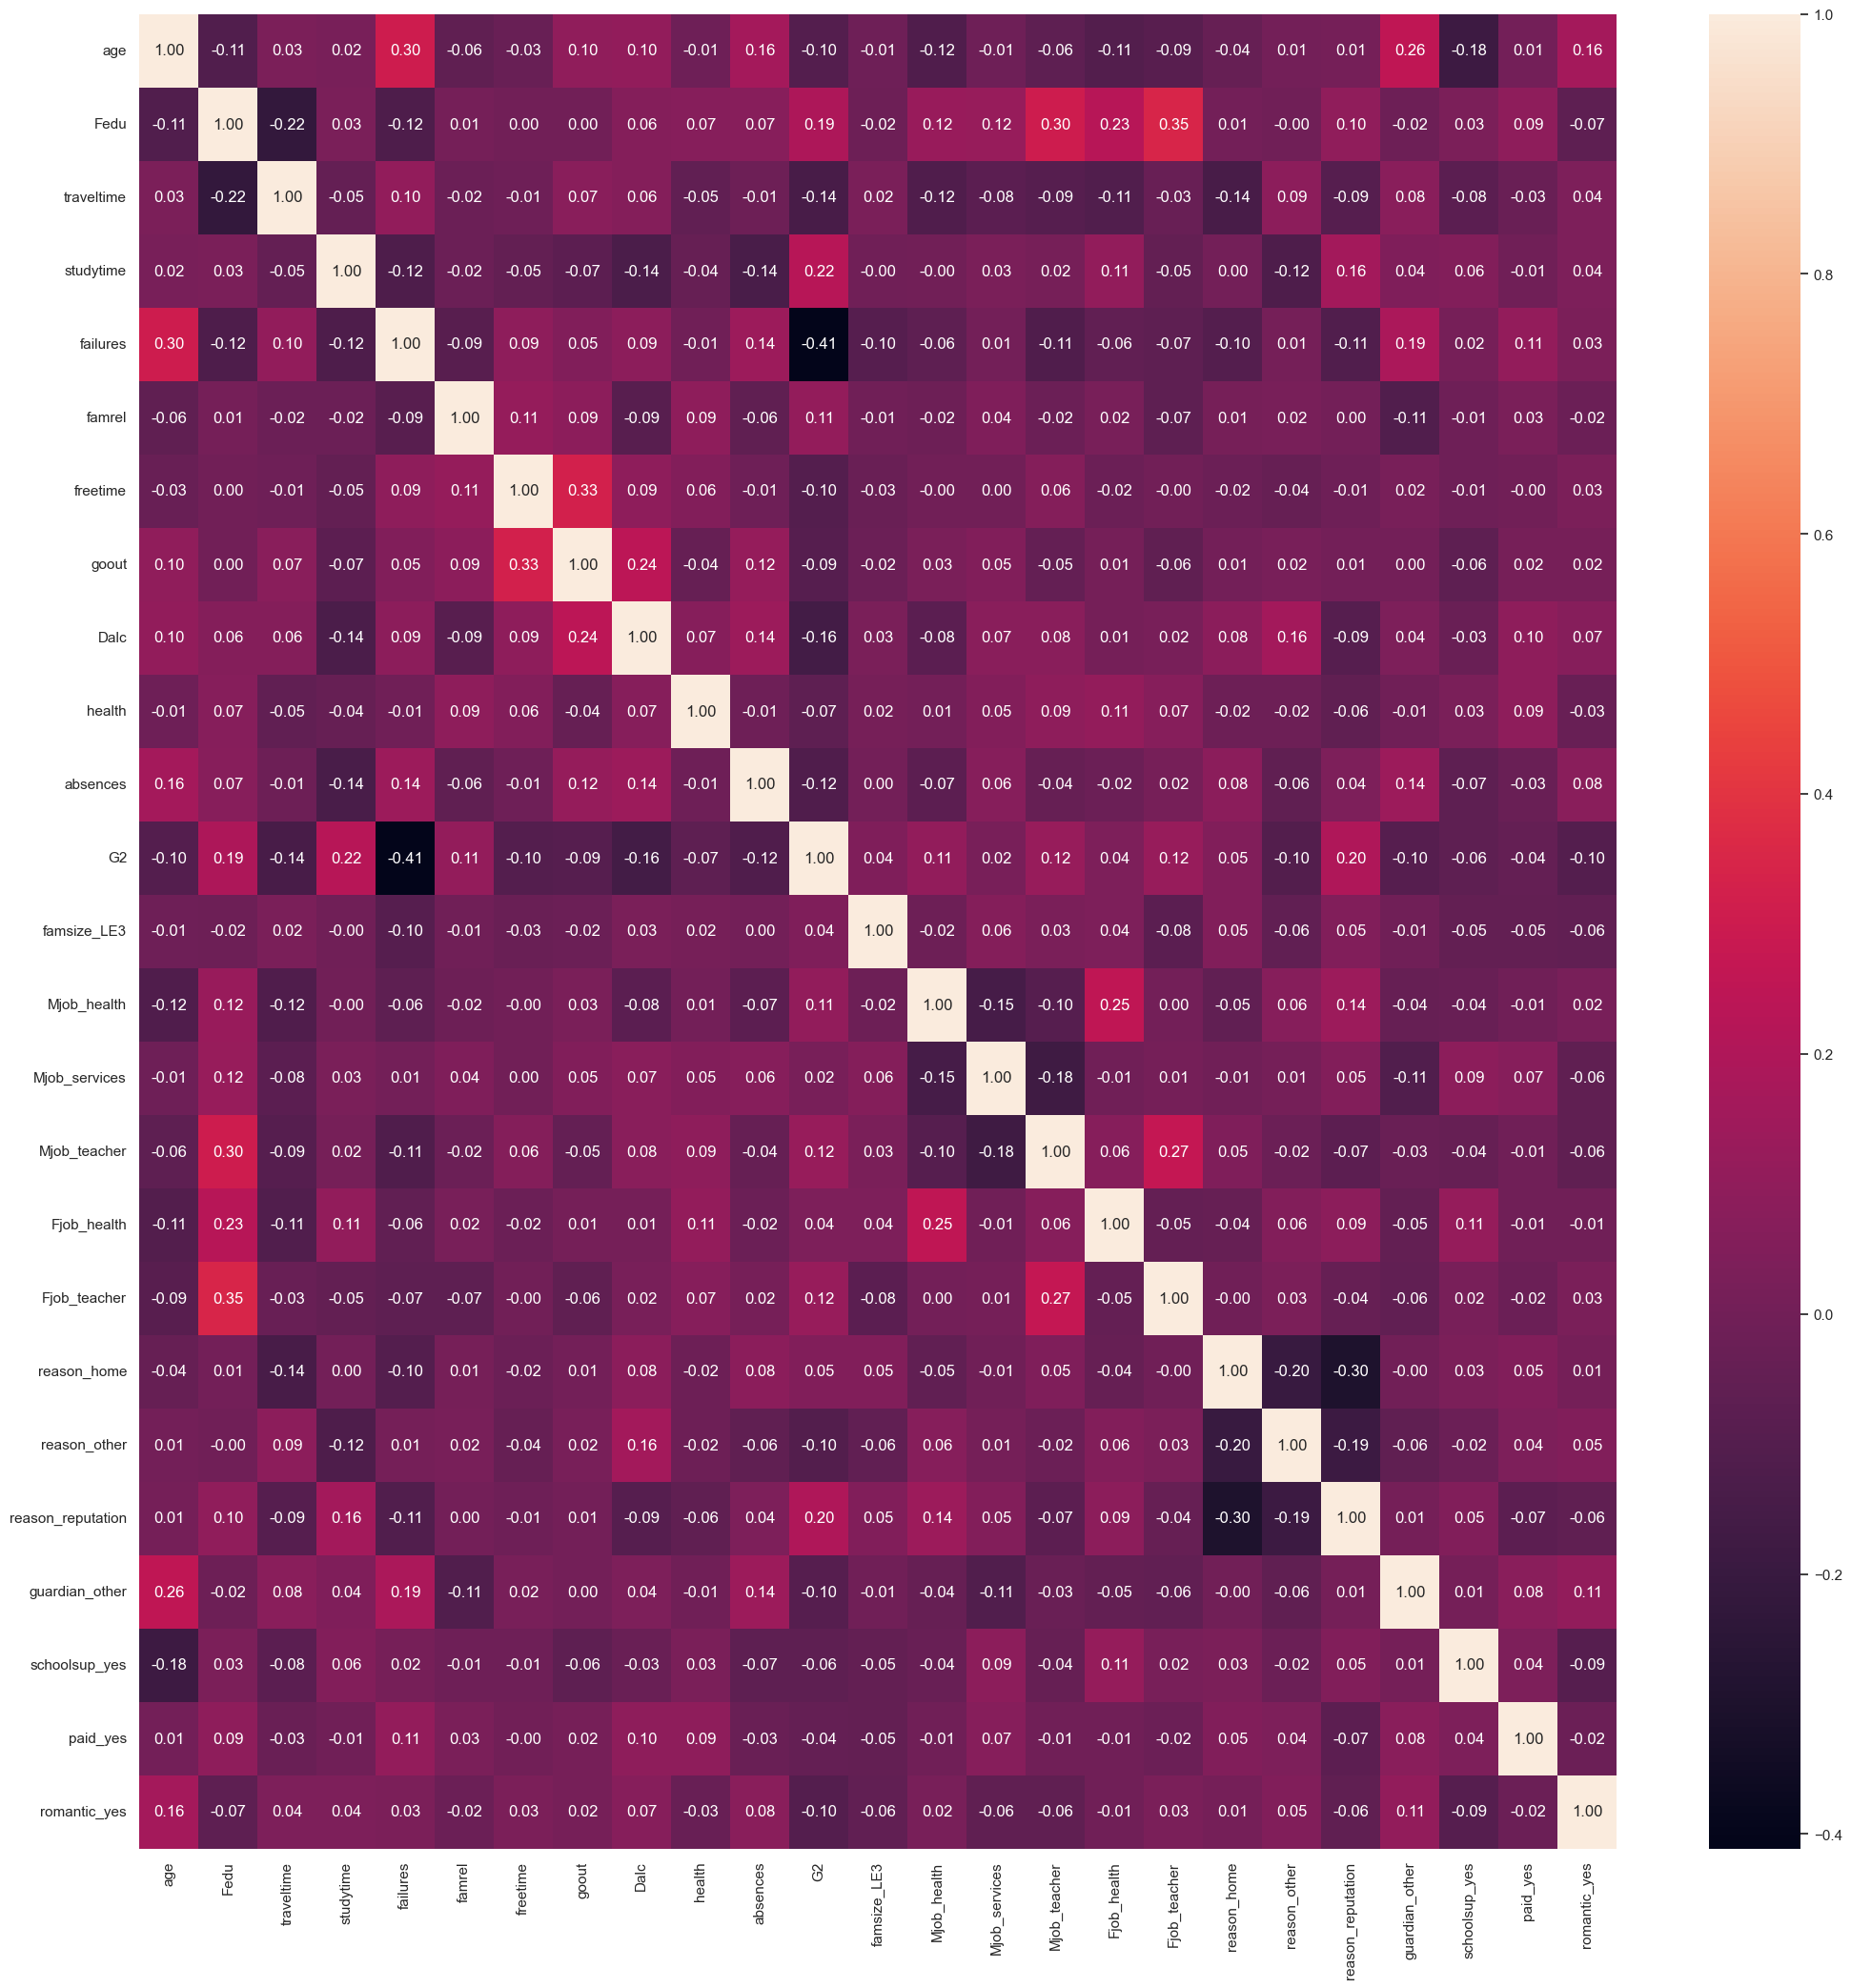

In [526]:
#numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_vif.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [527]:
# if this cell runs features with high VIF will not be in the model

X_train_scaled = X_train_scaled[df_vif.columns]
print(X_train_scaled.shape)

X_test_scaled = X_test_scaled[df_vif.columns]
print(X_test_scaled.shape)

(519, 25)
(130, 25)


# Modeling

In [528]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [529]:

print("\n--- Model Parameters ---")
print(f"Intercept (b): {model.intercept_:.4f}")

coefficients = pd.DataFrame(
    data=model.coef_,
    index=X_train_scaled.columns,
    columns=['Coefficient']
)

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
print("\nModel Coefficients (w):")
print(coefficients.sort_values(by='Abs_Coefficient', ascending=False))


--- Model Parameters ---
Intercept (b): 11.9759

Model Coefficients (w):
                   Coefficient  Abs_Coefficient
G2                    2.916158         2.916158
reason_other         -0.507161         0.507161
schoolsup_yes        -0.275124         0.275124
paid_yes             -0.206907         0.206907
guardian_other        0.202240         0.202240
Fjob_teacher         -0.195438         0.195438
Mjob_services         0.186394         0.186394
Mjob_health           0.153813         0.153813
romantic_yes          0.135421         0.135421
Fjob_health          -0.131984         0.131984
failures             -0.123701         0.123701
Mjob_teacher          0.121398         0.121398
reason_home          -0.111026         0.111026
famrel               -0.084139         0.084139
Dalc                 -0.078933         0.078933
freetime             -0.068405         0.068405
reason_reputation    -0.068085         0.068085
famsize_LE3           0.064670         0.064670
health        

In [530]:
Y_pred_train = model.predict(X_train_scaled)
Y_pred_test = model.predict(X_test_scaled)

print("\n✅ Predictions made on train and test data.")


✅ Predictions made on train and test data.


In [531]:
print("\n--- Model Evaluation ---")
print("Test Set Performance:")

r2_test = r2_score(Y_test, Y_pred_test)
print(f"  R-squared (R²): {r2_test:.4f}")

mae_test = mean_absolute_error(Y_test, Y_pred_test)
print(f"  Mean Absolute Error (MAE): {mae_test:,.4f}")

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print(f"  Root Mean Squared Error (RMSE): {rmse_test:,.4f}")

print("\nTrain Set Performance (for comparison):")

r2_train = r2_score(Y_train, Y_pred_train)
print(f"  R-squared (R²): {r2_train:.4f}")

mae_train = mean_absolute_error(Y_train, Y_pred_train)
print(f"  Mean Absolute Error (MAE): {mae_train:,.4f}")


--- Model Evaluation ---
Test Set Performance:
  R-squared (R²): 0.7450
  Mean Absolute Error (MAE): 0.8656
  Root Mean Squared Error (RMSE): 1.6440

Train Set Performance (for comparison):
  R-squared (R²): 0.8782
  Mean Absolute Error (MAE): 0.7595


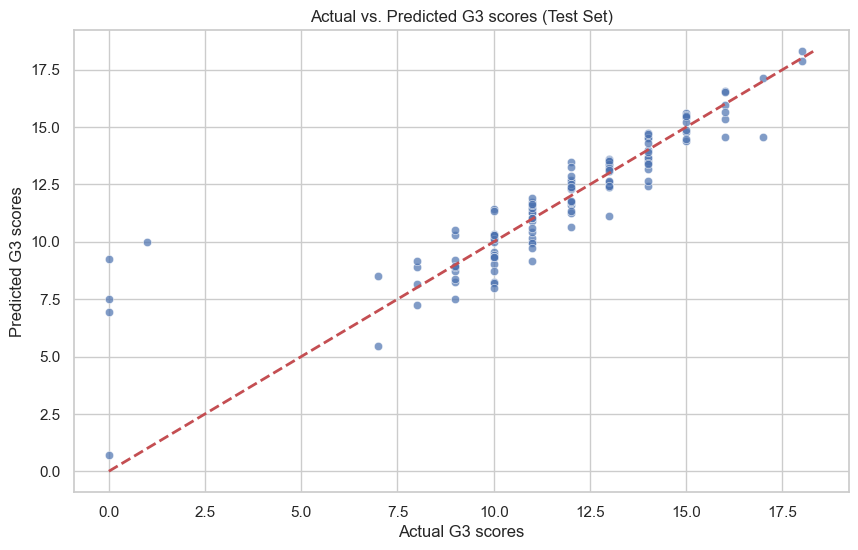

In [532]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred_test, alpha=0.7)

min_val = min(Y_test.min(), Y_pred_test.min())
max_val = max(Y_test.max(), Y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Actual G3 scores")
plt.ylabel("Predicted G3 scores")
plt.title("Actual vs. Predicted G3 scores (Test Set)")
plt.show()

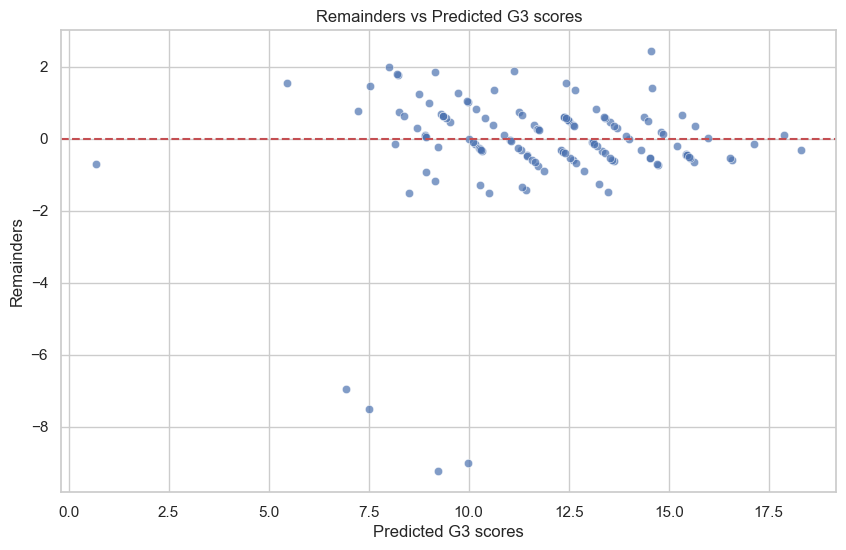

In [533]:
# error(y_test - y_pred) vs y_pred plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred_test, y = Y_test - Y_pred_test, alpha=0.7)
min_val = min(Y_test.min(), Y_pred_test.min())
max_val = max(Y_test.max(), Y_pred_test.max())

#plt.plot([0, 0], [max_val, max_val], 'r--', lw=2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Remainders vs Predicted G3 scores')
plt.ylabel("Remainders")
plt.xlabel("Predicted G3 scores")
plt.show()

# Improving The Model

In [534]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

def evaluate_model(model_name, model, x_test, y_test):
    """
    Makes predictions and prints evaluation metrics (R², MAE, RMSE).
    Handles the inverse transform (np.exp) for error metrics.
    """
    print(f"--- Evaluating Model: {model_name} ---")

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    print(f"  R-squared (R²): {r2:.4f}")

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"  Mean Absolute Error (MAE): {mae:,.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:,.4f}\n")

    return r2, mae, rmse

In [535]:
model_performance = {}

baseline_pipe = Pipeline([
    ('model', LinearRegression())
])
baseline_pipe.fit(X_train_scaled, Y_train)
r2, mae, rmse = evaluate_model("Baseline Linear Regression", baseline_pipe, X_test_scaled, Y_test)
model_performance['Baseline_Linear'] = (r2, mae)

--- Evaluating Model: Baseline Linear Regression ---
  R-squared (R²): 0.7450
  Mean Absolute Error (MAE): 0.8656
  Root Mean Squared Error (RMSE): 1.6440



In [536]:
print("Building Ridge (L2) Regularization Model...")

ridge_pipe = Pipeline([
    ('model', Ridge(alpha=55))  # alpha=1.0 is a common default to start with. A higher alpha = a stronger penalty / simpler model.
])

ridge_pipe.fit(X_train_scaled, Y_train)

r2, mae, rmse = evaluate_model("Ridge Regression (L2)", ridge_pipe, X_test_scaled, Y_test)
model_performance['Ridge_L2'] = (r2, mae)

Building Ridge (L2) Regularization Model...
--- Evaluating Model: Ridge Regression (L2) ---
  R-squared (R²): 0.7363
  Mean Absolute Error (MAE): 0.8577
  Root Mean Squared Error (RMSE): 1.6716



In [537]:
print("Building Lasso (L1) Regularization Model...")

lasso_pipe = Pipeline([
    ('model', Lasso(alpha=0.035))
])

lasso_pipe.fit(X_train_scaled, Y_train)

r2, mae, rmse = evaluate_model("Lasso Regression (L1)", lasso_pipe, X_test_scaled, Y_test)
model_performance['Lasso_L1'] = (r2, mae)

lasso_coefs = lasso_pipe.named_steps['model'].coef_

coef_df = pd.DataFrame(
    data=lasso_coefs,
    index=X_train_scaled.columns,
    columns=['Coefficient']
)

print("Lasso Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

Building Lasso (L1) Regularization Model...
--- Evaluating Model: Lasso Regression (L1) ---
  R-squared (R²): 0.7457
  Mean Absolute Error (MAE): 0.8647
  Root Mean Squared Error (RMSE): 1.6416

Lasso Coefficients:
                   Coefficient
G2                    2.906257
studytime             0.034556
absences              0.011582
age                  -0.000000
Fedu                  0.000000
Mjob_health           0.000000
famsize_LE3           0.000000
traveltime            0.000000
goout                 0.000000
paid_yes             -0.000000
reason_home          -0.000000
reason_reputation     0.000000
guardian_other        0.000000
Mjob_teacher          0.000000
Mjob_services         0.000000
Fjob_health          -0.000000
Fjob_teacher         -0.000000
romantic_yes          0.000000
schoolsup_yes        -0.000000
freetime             -0.023927
health               -0.039215
famrel               -0.055787
Dalc                 -0.058144
failures             -0.098471
reason_oth

In [538]:
print("Building Polynomial Regression Model...")

poly_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)), # 'degree=2' is standard. degree=3 or higher will likely overfit.
    ('model', LinearRegression())
])

poly_pipe.fit(X_train_scaled, Y_train)

r2, mae, rmse = evaluate_model("Polynomial Regression (Degree 4)", poly_pipe, X_test_scaled, Y_test)
model_performance['Polynomial_D4'] = (r2, mae)

Building Polynomial Regression Model...
--- Evaluating Model: Polynomial Regression (Degree 4) ---
  R-squared (R²): 0.4491
  Mean Absolute Error (MAE): 1.4234
  Root Mean Squared Error (RMSE): 2.4163



In [539]:
print("Building Polynomial + Ridge Regression Model...")

poly_ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('model', Ridge(alpha=27500)) # We use a stronger alpha to control the many new features
])

poly_ridge_pipe.fit(X_train_scaled, Y_train)

r2, mae, rmse = evaluate_model("Polynomial (D2) + Ridge (alpha=10)", poly_ridge_pipe, X_test_scaled, Y_test)
model_performance['Poly_Ridge'] = (r2, mae)

Building Polynomial + Ridge Regression Model...
--- Evaluating Model: Polynomial (D2) + Ridge (alpha=10) ---
  R-squared (R²): 0.4361
  Mean Absolute Error (MAE): 1.6166
  Root Mean Squared Error (RMSE): 2.4447



In [540]:
print("--- Final Model Comparison ---")

results_df = pd.DataFrame.from_dict(
    model_performance,
    orient='index',
    columns=['R_squared', 'Mean_Absolute_Error']
)

print(results_df.sort_values(by='R_squared', ascending=False))

--- Final Model Comparison ---
                 R_squared  Mean_Absolute_Error
Lasso_L1          0.745706             0.864660
Baseline_Linear   0.744969             0.865587
Ridge_L2          0.736335             0.857689
Polynomial_D4     0.449099             1.423411
Poly_Ridge        0.436051             1.616625
